100%|████████████████████████████████████████████████████████████████████████████| 4999/4999 [00:01<00:00, 4346.58it/s]


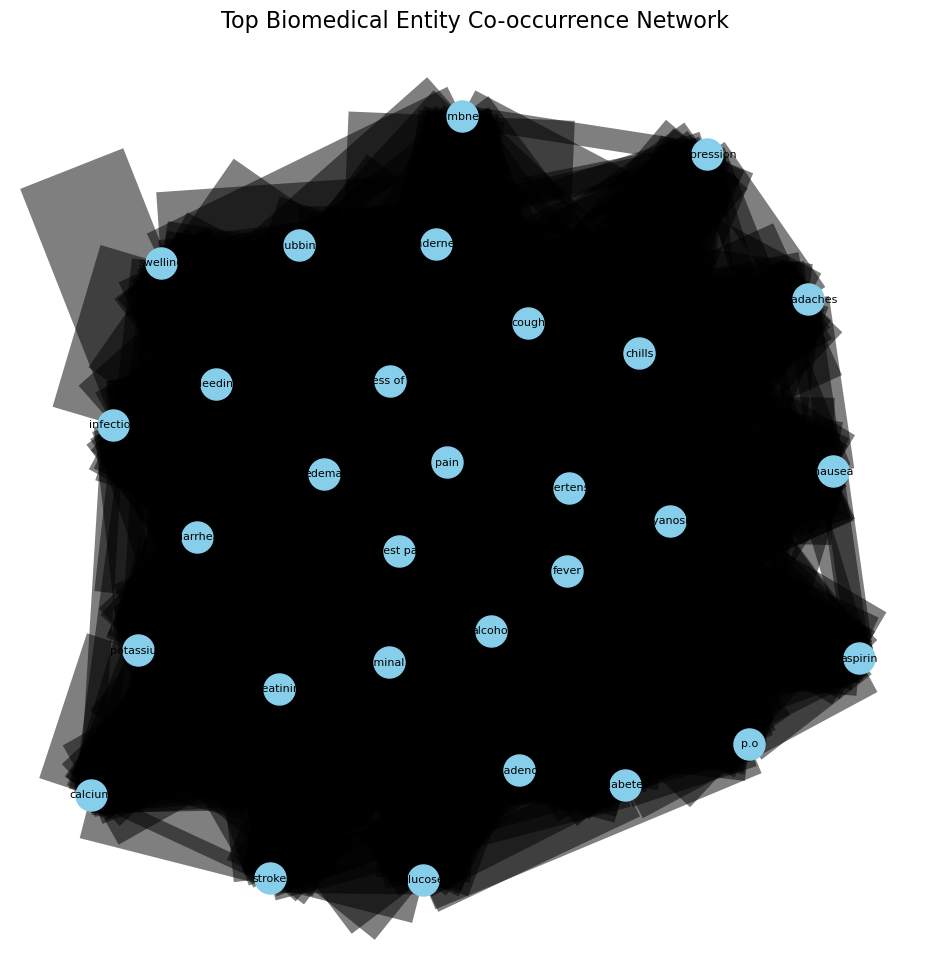

In [5]:
from pathlib import Path
import pandas as pd
import ast
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
from tqdm import tqdm

ENTITIES_PATH = Path(r"C:\Users\praty\Downloads\Medical_transcription\data\processed\entities_extracted_bio.csv")
df = pd.read_csv(ENTITIES_PATH)

def parse_entities(cell):
    return cell if isinstance(cell, list) else ast.literal_eval(cell)

co_occurrence = Counter()
for ents in tqdm(df["entities"].apply(parse_entities), total=len(df)):
    texts = [ent["text"] for ent in ents]
    for e1, e2 in combinations(set(texts), 2):
        co_occurrence[tuple(sorted((e1, e2)))] += 1

G = nx.Graph()
for (e1, e2), weight in co_occurrence.items():
    G.add_edge(e1, e2, weight=weight)

top_entities = {node for node, _ in Counter([n for edge in G.edges for n in edge]).most_common(30)}
G_filtered = G.subgraph(top_entities)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_filtered, k=0.5, seed=42)
nx.draw_networkx_nodes(G_filtered, pos, node_size=500, node_color='skyblue')
nx.draw_networkx_edges(G_filtered, pos, width=[G_filtered[u][v]['weight'] for u, v in G_filtered.edges], alpha=0.5)
nx.draw_networkx_labels(G_filtered, pos, font_size=8)
plt.title("Top Biomedical Entity Co-occurrence Network", fontsize=16)
plt.axis("off")
plt.show()

In [7]:
#a mess

100%|████████████████████████████████████████████████████████████████████████████| 4999/4999 [00:01<00:00, 4128.69it/s]


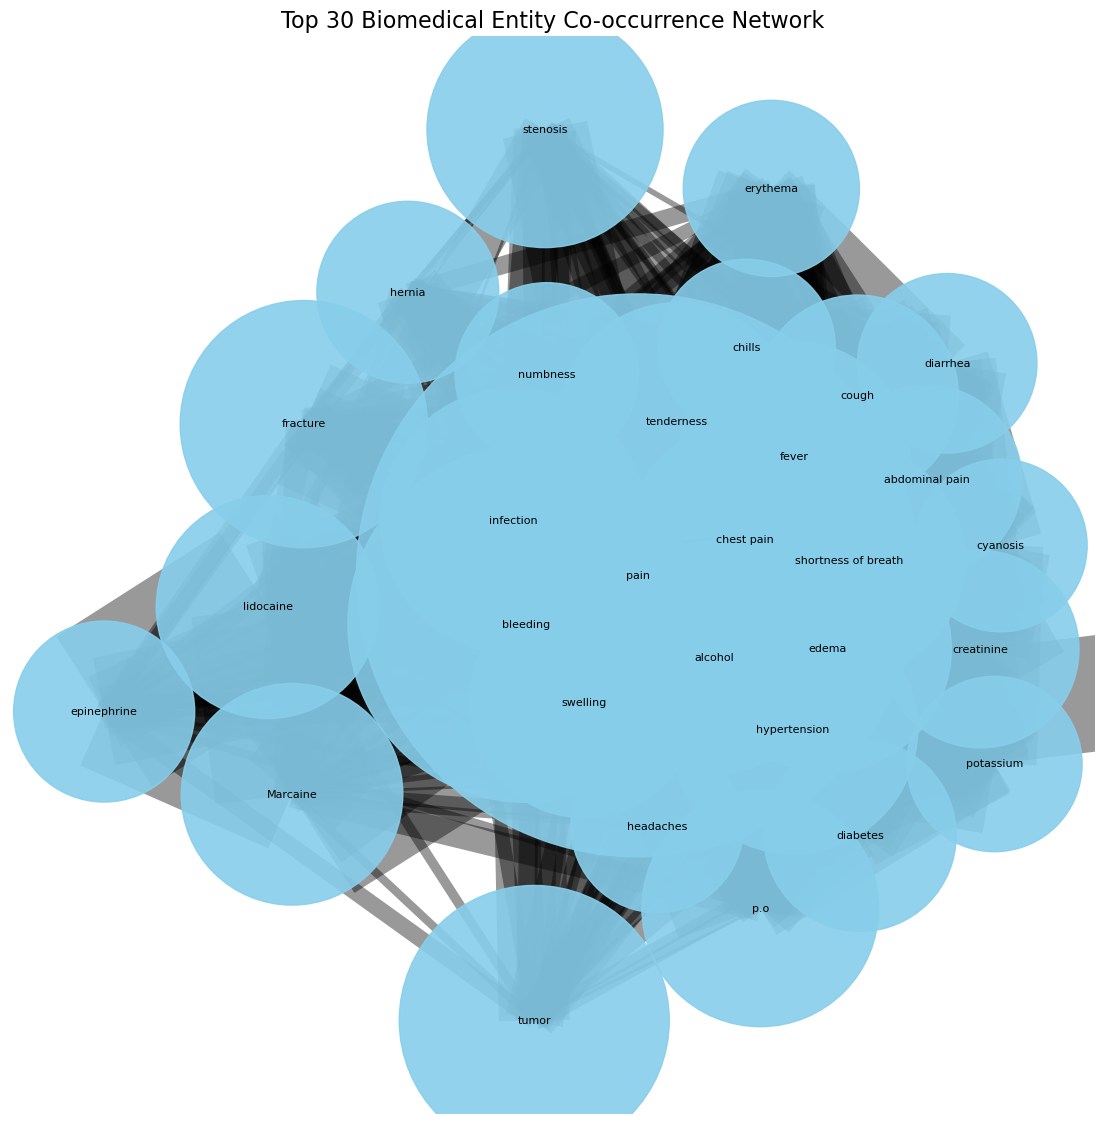

In [9]:
ENTITIES_PATH = Path(r"C:\Users\praty\Downloads\Medical_transcription\data\processed\entities_extracted_bio.csv")
df = pd.read_csv(ENTITIES_PATH)

def parse_entities(cell):
    return cell if isinstance(cell, list) else ast.literal_eval(cell)

# Frequency counts
entity_freq = Counter()
co_occurrence = Counter()
for ents in tqdm(df["entities"].apply(parse_entities), total=len(df)):
    texts = [ent["text"] for ent in ents]
    entity_freq.update(texts)
    for e1, e2 in combinations(set(texts), 2):
        co_occurrence[tuple(sorted((e1, e2)))] += 1

# Keep top N entities only
TOP_N = 30
top_entities = {ent for ent, _ in entity_freq.most_common(TOP_N)}

# Build filtered graph
G = nx.Graph()
for (e1, e2), weight in co_occurrence.items():
    if e1 in top_entities and e2 in top_entities:
        G.add_edge(e1, e2, weight=weight)

# Node sizes = frequency, edge widths = co-occurrence weight
node_sizes = [entity_freq[n] * 50 for n in G.nodes]
edge_widths = [G[u][v]['weight'] for u, v in G.edges]

plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G, k=0.6, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.9)
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title(f"Top {TOP_N} Biomedical Entity Co-occurrence Network", fontsize=16)
plt.axis("off")
plt.show()

C:\Windows\Temp\ipykernel_15516\1237084829.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


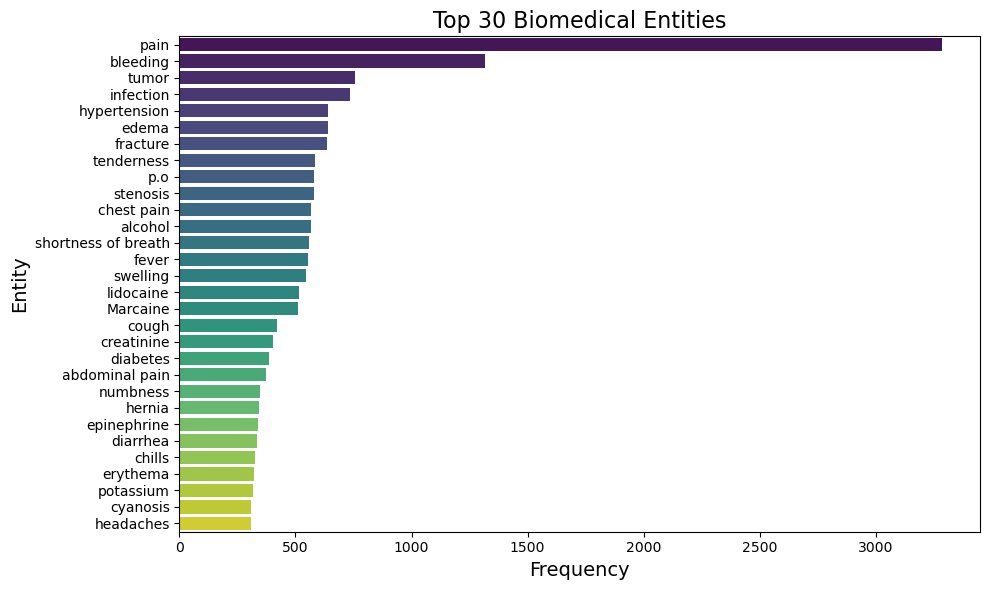

In [17]:
import seaborn as sns

df = pd.read_csv(r"C:\Users\praty\Downloads\Medical_transcription\data\processed\entities_extracted_bio.csv")

entity_freq = Counter()
for ents_str in df["entities"]:
    ents = ents_str if isinstance(ents_str, list) else ast.literal_eval(ents_str)
    entity_freq.update(ent["text"] for ent in ents)

top_entities = entity_freq.most_common(30)
entities, counts = zip(*top_entities)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=list(counts),
    y=list(entities),
    palette=sns.color_palette("viridis", n_colors=len(entities)),
    legend=False
)
plt.title("Top 30 Biomedical Entities", fontsize=16)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Entity", fontsize=14)
plt.tight_layout()
plt.show()